In [6]:
import pandas as pd
import csv
import numpy as np

In [7]:
### Make matrix with all movie
all_tropes = []
matrix_maker = []
genres = []
with open("C:/Users/jbro0/OneDrive/Desktop/College_Stuff/PoCSVerse/Project/Github Stuff/Pocs_Film_Project/Data/liteweight/2020_genre_counts_by_trope.csv", "r") as file:
    reader = csv.reader(file)
    row1 = next(reader)
    for i in range(2,29):
            genres.append(row1[i])
    for line in reader:
        #line_list = line.split(",")
        all_tropes.append(line[1])
        genre_counts = []
        for i in range(2,29):
            genre_counts.append(int(line[i]))
        normalization = sum(genre_counts)
        try:
            genre_percents = [genre_count / normalization for genre_count in genre_counts]
            matrix_maker.append(genre_percents)
        except ZeroDivisionError:
            matrix_maker.append(genre_counts)
    
bad_matrix = np.array(matrix_maker)
matrix = bad_matrix.transpose()
print(len(all_tropes))

26246


In [8]:
### Define step function
def H(x,t):
    if x < t:
        return 0
    elif x >= t:
        return 1

In [ ]:
### Fill in movie vector
tau = 7014 ### This is the lifetime of the trope
def vec_filler(x):
    movie_vec = [0] * len(all_tropes)
    with open("C:/Users/jbro0/Downloads/Alien Tropes - CodeTest.tsv", "r") as file:
        tsv_reader = csv.reader(file, delimiter='\t')
        next(tsv_reader)
        for line in tsv_reader:
            trope = line[0].replace(" ", "")
            if trope in all_tropes:
                vec_index = all_tropes.index(trope)
                if line[1] == "Yes" or line[2] == "Yes" and line[5] != "Yes":
                    movie_vec[vec_index] -= H((tau + float(line[6])) /  float(line[8]), x) * H(x, float(line[6]) / float(line[8]))
                elif line[5] == "Yes":
                    pass
                else:
                    movie_vec[vec_index] += H((tau + float(line[6])) /  float(line[8]), x) * H(x, float(line[6]) / float(line[8]))
            elif trope not in all_tropes:
                pass ### Need to find a way to keep track of this
    normalizer = sum(movie_vec)
    try:
        movie_vec = [element / normalizer for element in movie_vec]
        movie_vec = np.array(movie_vec)
        return movie_vec
    except ZeroDivisionError:
        return movie_vec

In [57]:
import matplotlib.pyplot as plt
x = 0
snapshots = []
x_points = []
while x <= 1:
    new_basis_vec = np.matmul(matrix, vec_filler(x))
    new_basis_vec = list(new_basis_vec)
    snapshots.append(new_basis_vec)
    x_points.append(x)
    x += 0.01


(0.0, 1.0, 0.0, 1.0)

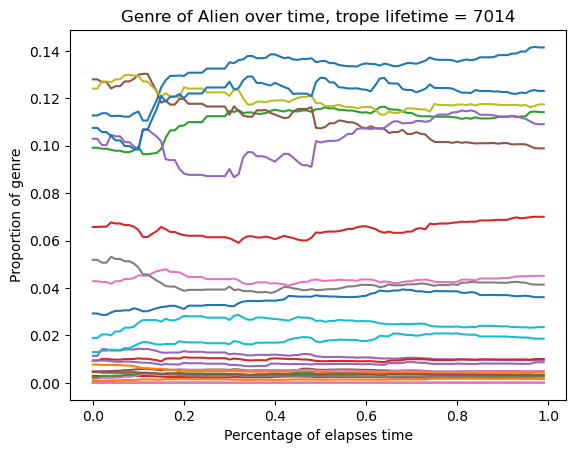

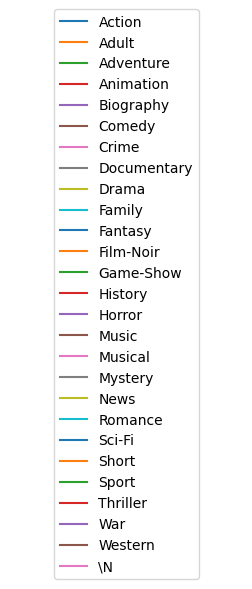

In [58]:
### All genres
genre_proportions = np.transpose(snapshots)
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(0, len(genres)):
    ax.plot(x_points, genre_proportions[i], label = genres[i])
plt.xlabel("Percentage of elapses time")
plt.ylabel("Proportion of genre")
plt.title("Genre of Alien over time, trope lifetime = " + str(tau))

# then create a new image
# adjust the figure size as necessary
figsize = (3, 3)
fig_leg = plt.figure(figsize=figsize)
ax_leg = fig_leg.add_subplot(111)
# add the legend from the previous axes
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center')
# hide the axes frame and the x/y labels
ax_leg.axis('off')


In [49]:
averages = []
top_genres = []
top_genre_props = []
for row in genre_proportions:
    averages.append(np.mean(row))
ranked = averages.copy()
ranked.sort()
for i in range(0,6):
    maximum = np.max(ranked)
    ranked.remove(maximum)
    index = averages.index(maximum)
    top_genres.append(genres[index])
    top_genre_props.append(genre_proportions[index])

(0.0, 1.0, 0.0, 1.0)

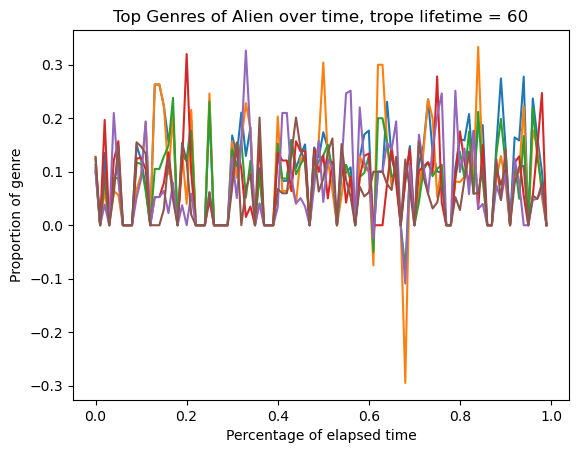

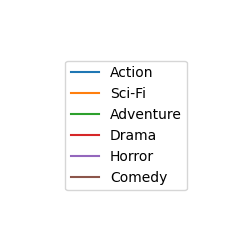

In [50]:
### Top 6
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(0, len(top_genres)):
    ax.plot(x_points, top_genre_props[i], label = top_genres[i])
plt.xlabel("Percentage of elapsed time")
plt.ylabel("Proportion of genre")
plt.title("Top Genres of Alien over time, trope lifetime = " + str(tau))

# then create a new image
# adjust the figure size as necessary
figsize = (3, 3)
fig_leg = plt.figure(figsize=figsize)
ax_leg = fig_leg.add_subplot(111)
# add the legend from the previous axes
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center')
# hide the axes frame and the x/y labels
ax_leg.axis('off')

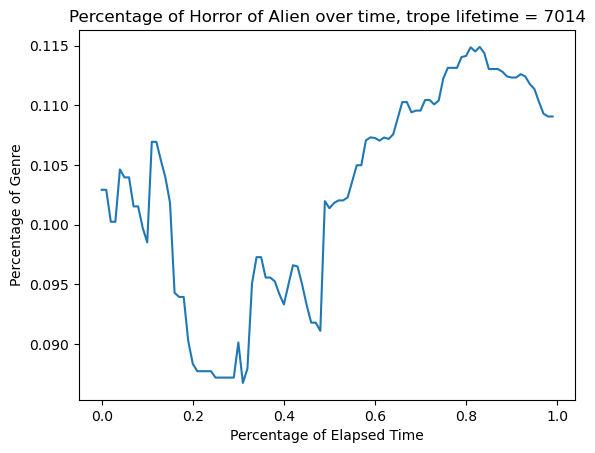

In [59]:
### Dealers Choice
genre = "Horror"  ### Input genre here

_index = genres.index(genre)
props = list(genre_proportions[_index])
plt.plot(x_points, props)
plt.xlabel("Percentage of Elapsed Time")
plt.ylabel("Percentage of Genre")
plt.title("Percentage of " + genre + " of Alien over time, trope lifetime = " + str(tau))
plt.show()